# Microsoft Movie Studios Analysis
**Authors:** Blake Elieff

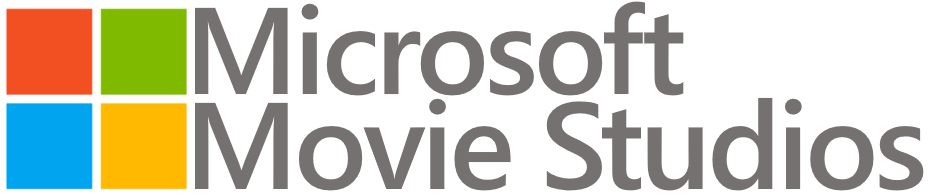

## Overview
This project is to determine what type of films Microsoft's new movie studio should be creating. I have used data from multiple sources to come to a conclusion and have used visual elements to assist in conveying my findings. Microsoft can use my analysis to ensure they are producing the correct type of films.

## Business Problem
Microsoft Movie Studios are looking to start producing films but require guidance on what type to make. Without this analysis, Microsoft may produce films that are not going to be popular or profitable. Using my sourced data, i have determined which types of movies are the most profitable and popular so that Microsoft is able to start producing.

## Data Understanding

In [198]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
bomgross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
imdbtbasics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
imdbtratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

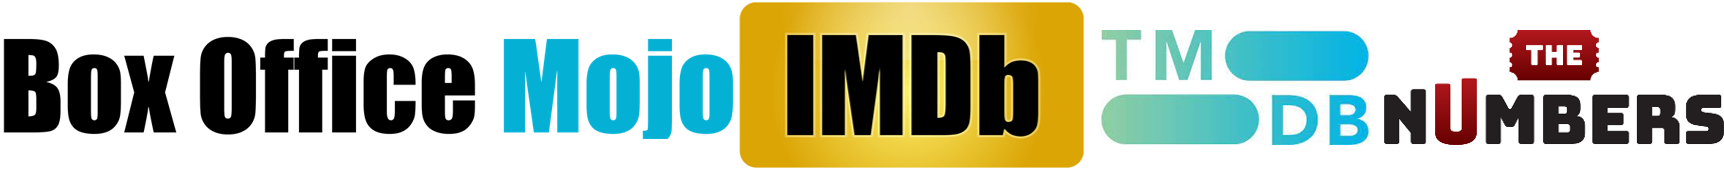

Using these 5 datasets, there is some differentiation between them:
- Bom.movie_gross and tn.movie_budgets both focus on the financial aspect of the films
- imdb.title.ratings and tmdb.movies focus on the popularity and ratings of the films
- imdb.title.basics gives basic information on the films

In [200]:
bomgross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [201]:
imdbtbasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [202]:
imdbtratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [203]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [204]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Box Office Mojo Gross Data
The bomgross dataset displays for the foreign and domestic gross, aswell as the studio that each film was produced by for 257 different studios. Although this dataset does not include a type of film, i determine high grossing film types by external research

In [205]:
bomgross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [206]:
bomgross['studio'].value_counts()

IFC             166
Uni.            147
WB              140
Fox             136
Magn.           136
               ... 
AM                1
AZ                1
Darin Southa      1
GrtIndia          1
BGP               1
Name: studio, Length: 257, dtype: int64

### IMDB Title Basics Data
The IMDB Basics dataset gives us the film names, genres and a tconst.
I have determined that tconst is different for every film so i am able to join this to the next data set


In [207]:
imdbtbasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [208]:
print(len(imdbtbasics['tconst']))
print(len(imdbtbasics['tconst'].value_counts()))

146144
146144


### IMDB Title Ratings Data
The IMDB Ratings dataset has the tconst, an average ratings and the number of votes. So although the title of the film is not included, we are able to join this with the IMDB Title dataset to give us the Title and genre of each film.

In [209]:
imdbtratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### The Movie DataBase Data
The TMDB dataset includes the title, average vote and even has a popularity rating. However, stand alone we are unable to determine the genre of each film as they are assigned a numerical ID. In the analysis stage i conduct further research and map what each ID represents to a new dataframe

In [210]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### The Numbers Data
The Numbers dataset includes a Title, budget and gross. Unfortunately no genre is included so to know the genre of high grossing films i have to do external research

In [211]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation
### Data Cleaning
#### Cleaning the Box Office Mojo Movie Gross csv data

In [212]:
bomgross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [213]:
bomgross['foreign_gross'] = pd.to_numeric(bomgross['foreign_gross'], errors='coerce')
bomgross['foreign_gross'] = bomgross['foreign_gross'].fillna(bomgross['foreign_gross'].median())
bomgross['domestic_gross'] = bomgross['domestic_gross'].fillna(bomgross['domestic_gross'].median())
bomgross = bomgross.dropna(subset=['studio'])
bomgross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [214]:
bomgross['total_gross'] = bomgross['foreign_gross']+bomgross['domestic_gross']
bomgross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


#### Cleaning the IMDB Title Basics csv data
For this data set i replaced the NaN values in the runtime_minutes column with the median value
I then removed the rest of the rows that contained NaN values

In [215]:
imdbtbasics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [216]:
imdbtbasics['runtime_minutes'] = imdbtbasics['runtime_minutes'].fillna(imdbtbasics['runtime_minutes'].median())

In [217]:
imdbtbasics.dropna(inplace=True)

In [218]:
imdbtbasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Cleaning the IMDB Title Ratings csv data
No cleaning was required for this dataset

In [219]:
imdbtratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [220]:
imdbtratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Cleaning The Movie Database Movies csv
For this dataset; i removed the first column as it was the same as the index

In [221]:
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [222]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [223]:
tmdb = tmdb.drop('Unnamed: 0', axis=1)

In [224]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Cleaning the 'The Numbers' csv data

In [225]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [226]:
tn.columns = [col.strip() for col in tn.columns]
tn.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [227]:
tn.set_index('id', inplace=True)

In [228]:
tn[tn.columns[2:]] = tn[tn.columns[2:]].replace('[\$,]','', regex=True).astype(float)

In [229]:
tn['profit'] = tn['worldwide_gross']-tn['production_budget']

In [230]:
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


## Data Modeling
### Analysis
Ive split this into 2 parts, one being an analysis on the financial databases and another the ratings/popularity based databases
#### Financial Analysis
This analysis will determine the highest grossing and highest profitable genres
##### Box Office Mojo Gross Data

In [231]:
bomgross.sort_values('total_gross', ascending=False, inplace=True)
bomgross.reset_index(drop=True, inplace=True)

In [232]:
bomgross.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
5,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
7,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
8,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
9,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


**To determine the type of film for this top 10, i conducted some external research to build the following list of genres in order of the current index**

In [233]:
bomgenre = ['Action, Adventure, SuperHero, Sci-Fi, Fantasy',
           'Action, Adventure, SuperHero, Sci-Fi',
           'Action, Adventure, SuperHero, Sci-Fi, Fantasy',
           'Drama, Fantasy, Adventure, Mystery, Narrative',
           'Action, Sci-Fi, Adventure, Fantasy, Space Opera',
           'Action, Sci-Fi',
           'Childrens Film, Musical, Comedy, Adventure, Fantasy, Animation',
           'Romance, Childrens Film, Fantasy, Musical',
           'Childrens Film, Action, SuperHero, Comedy, Adventure, Sci-Fi, Animation',
           'Action, Comedy, SuperHero, Sci-Fi, Adventure']

In [234]:
bomse = pd.Series(bomgenre)

**Here i build a dataframe using the top 10 grossing films and include their Genres**

In [235]:
bom10 = bomgross.head(10)
bom10['genre'] = bomse.values

In [236]:
bom10

,title,studio,domestic_gross,foreign_gross,year,total_gross,genre
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,"Action, Adventure, SuperHero, Sci-Fi, Fantasy"
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,"Action, Adventure, SuperHero, Sci-Fi"
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,"Action, Adventure, SuperHero, Sci-Fi, Fantasy"
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,"Drama, Fantasy, Adventure, Mystery, Narrative"
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,"Action, Sci-Fi, Adventure, Fantasy, Space Opera"
5,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,"Action, Sci-Fi"
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,"Childrens Film, Musical, Comedy, Adventure, Fa..."
7,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09,"Romance, Childrens Film, Fantasy, Musical"
8,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09,"Childrens Film, Action, SuperHero, Comedy, Adv..."
9,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,"Action, Comedy, SuperHero, Sci-Fi, Adventure"


In [237]:
ind_genres = ['Action','Adventure','SuperHero','Sci-Fi','Fantasy','Drama','Mystery','Narrative','Space Opera','Childrens Film',
             'Musical','Comedy','Romance','Animation']

In [238]:
GenreInfo = pd.DataFrame(ind_genres, columns=['Genre'])

In [239]:
Frequency = []
gross = []
for genre in ind_genres:
    gross.append(bom10[bom10['genre'].str.contains(genre)]['total_gross'].mean())
    Frequency.append(bom10['genre'].str.count(genre).sum())

In [240]:
GenreInfo['Frequency%'] = pd.DataFrame(Frequency) / 10 * 100
GenreInfo['Avg_Gross'] = pd.DataFrame(gross)

In [241]:
GenreInfo

,Genre,Frequency%,Avg_Gross
0,Action,70.0,1.338714e+09
1,Adventure,80.0,1.334925e+09
2,SuperHero,50.0,1.345780e+09
3,Sci-Fi,70.0,1.338714e+09
4,Fantasy,60.0,1.346650e+09
5,Drama,10.0,1.341500e+09
6,Mystery,10.0,1.341500e+09
7,Narrative,10.0,1.341500e+09
8,Space Opera,10.0,1.332600e+09
9,Childrens Film,30.0,1.260900e+09


**In this plot i show that in the top 10 grossing films; Adventure is the most frequent genre, closely followed by Action and Sci-Fi**

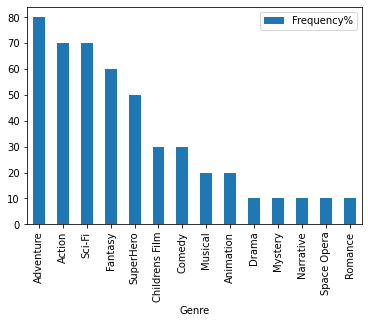

In [242]:
GenreInfo.sort_values('Frequency%', ascending=False).plot(x='Genre',y='Frequency%',kind='bar');

##### The Numbers Data
Here i repeat the same process that i used for the BOM data

In [243]:
tn.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08


In [244]:
tn.sort_values('profit',ascending=False, inplace=True)
tn.reset_index(drop=True, inplace=True)

In [245]:
tngenre = ['Action, Adventure, Mystery, Sci-Fi, Fantasy',
           'Romance, Disaster, Drama, Historical Drama',
           'Action, SuperHero, Sci-Fi',
           'Action, Sci-Fi, Adventure, Fantasy, Space Opera',
           'Action, Sci-Fi, Adventure, Thriller',
           'Action, Crime, Adventure, Thriller, Mystery',
           'Action, Adventure, SuperHero, Sci-Fi, Fantasy',
           'Drama, Fantasy, Adventure, Mystery, Narrative',
           'Action, Adventure, SuperHero, Sci-Fi',
           'Action, Sci-Fi']

In [246]:
tnse = pd.Series(tngenre)

In [247]:
tn10 = tn.head(10)
tn10['genre'] = tnse.values
tn10

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,genre
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,"Action, Adventure, Mystery, Sci-Fi, Fantasy"
1,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,"Romance, Disaster, Drama, Historical Drama"
2,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,"Action, SuperHero, Sci-Fi"
3,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,"Action, Sci-Fi, Adventure, Fantasy, Space Opera"
4,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,"Action, Sci-Fi, Adventure, Thriller"
5,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,"Action, Crime, Adventure, Thriller, Mystery"
6,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,"Action, Adventure, SuperHero, Sci-Fi, Fantasy"
7,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,"Drama, Fantasy, Adventure, Mystery, Narrative"
8,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,"Action, Adventure, SuperHero, Sci-Fi"
9,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,"Action, Sci-Fi"


In [284]:
indtn_genres = ['Action','Adventure','Mystery','Sci-Fi','Fantasy','Romance','Disaster','Drama','Historical Drama','SuperHero',
             'Thriller','Space Opera','Crime','Narrative']

In [288]:
GenreInfotn = pd.DataFrame(indtn_genres, columns=['Genre'])

In [289]:
Frequency = []
gross = []
for genre in indtn_genres:
    gross.append(tn10[tn10['genre'].str.contains(genre)]['profit'].mean())
    Frequency.append(tn10['genre'].str.count(genre).sum())

In [290]:
GenreInfotn['Frequency%'] = pd.DataFrame(Frequency) / 10 * 100
GenreInfotn['Profit'] = pd.DataFrame(gross)
GenreInfotn

,Genre,Frequency%,Profit
0,Action,80.0,1.523292e+09
1,Adventure,70.0,1.502732e+09
2,Mystery,30.0,1.632254e+09
3,Sci-Fi,70.0,1.551087e+09
4,Fantasy,40.0,1.652071e+09
5,Romance,10.0,2.008208e+09
6,Disaster,10.0,2.008208e+09
7,Drama,30.0,1.612451e+09
8,Historical Drama,10.0,2.008208e+09
9,SuperHero,30.0,1.396443e+09


**In comparing the top 10 profitable movies, 80% of them include action followed by Adventure and Sci-Fi at 70%**

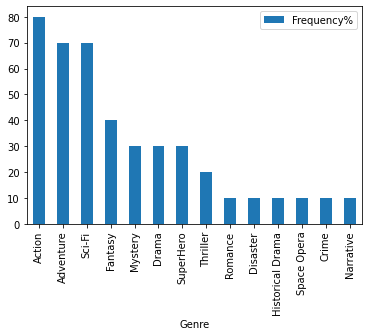

In [291]:
GenreInfotn.sort_values('Frequency%', ascending=False).plot(x='Genre',y='Frequency%',kind='bar');

#### Ratings Analysis

##### Analysis of the TMDB Database
To analyze the TMDB dataset, i started by extracting a list of individual genre ids. I did this because i wanted to map the actual genre names to each ID in a new dataframe. I Decided to analyze individual genres instead of combinations of genres as each genre itself has a large affect on each film.

In [252]:
tmdb.sort_values('vote_count',ascending=False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
...,...,...,...,...,...,...,...,...,...
14071,[],312155,en,Merely Players,0.600,2014-12-16,Merely Players,3.0,1
14075,[],287781,en,24 Hours,0.600,2014-07-25,24 Hours,3.0,1
14078,[27],274257,en,The First Wave,0.600,2014-01-10,The First Wave,3.0,1
14087,[35],365539,en,Cinema Purgatorio,0.600,2014-06-01,Cinema Purgatorio,2.5,1


In [253]:
tmdb =tmdb[tmdb.genre_ids != '[]']
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [254]:
lst = tmdb['genre_ids'].tolist()

In [255]:
extended_lst = []
for ids in lst:
    x = ids.replace('[','')
    y = x.replace(']','')
    z = y.split(',') 
    extended_lst.extend(z)
extended_lst = [x.strip(' ') for x in extended_lst]

In [256]:
unique_lst = []
unique_lst = list(set(extended_lst))
unique_lst

['12',
 '10402',
 '80',
 '10751',
 '35',
 '37',
 '14',
 '27',
 '18',
 '99',
 '28',
 '10749',
 '9648',
 '10770',
 '16',
 '53',
 '36',
 '878',
 '10752']

**To workout what Genre ID represented i searched them up, then I am going to map them to another column with their respective values**

In [257]:
legend = {'28':'Action','12':'Adventure','16':'Animation','35':'Comedy','80':'Crime','99':'Documentary','18':'Drama',
         '10751':'Family','14':'Fantasy','36':'History','27':'Horror','10402':'Music','9648':'Mystery','10749':'Romance',
         '878':'Science Fiction','10770':'TV Movie','53':'Thriller','10752':'War','37':'Western'}

In [258]:
TMDB_A = pd.DataFrame(unique_lst, columns=['Genre_ID'])

In [259]:
TMDB_A.head()

,Genre_ID
0,12
1,10402
2,80
3,10751
4,35


In [260]:
TMDB_A['Genres'] = TMDB_A['Genre_ID'].map(legend)
TMDB_A.head()

,Genre_ID,Genres
0,12,Adventure
1,10402,Music
2,80,Crime
3,10751,Family
4,35,Comedy


In [261]:
Frequency = []
Popularity = []
Avg_Vote = []
Vote_Count = []
for genre in unique_lst:
    Popularity.append(tmdb[tmdb['genre_ids'].str.contains(genre)]['popularity'].median())
    Avg_Vote.append(tmdb[tmdb['genre_ids'].str.contains(genre)]['vote_average'].median())
    Frequency.append(tmdb['genre_ids'].str.count(genre).sum())
    Vote_Count.append(np.where(tmdb['genre_ids'].str.contains(genre),tmdb['vote_count'],0).sum())

**Here i build my own dataframe that allows me to visualise the data in a more user friendly way**

In [262]:
TMDB_A['Frequency'] = pd.DataFrame(Frequency)
TMDB_A['Avg_Vote'] = pd.DataFrame(Avg_Vote)
TMDB_A['Vote_Count'] = pd.DataFrame(Vote_Count)
TMDB_A['Popularity'] = pd.DataFrame(Popularity)
TMDB_A['Votes_Per_Movie'] = TMDB_A['Vote_Count'] / TMDB_A['Frequency']
TMDB_A

,Genre_ID,Genres,Frequency,Avg_Vote,Vote_Count,Popularity,Votes_Per_Movie
0,12,Adventure,1400,6.0,1645828,4.3815,1175.591429
1,10402,Music,1267,7.0,87434,0.8020,69.008682
2,80,Crime,1515,6.0,632686,3.2790,417.614521
3,10751,Family,1565,6.0,652585,2.2110,416.987220
4,35,Comedy,5652,6.0,1403883,1.9280,248.386943
5,37,Western,205,6.0,92667,1.9020,452.034146
6,14,Fantasy,1139,6.0,902816,3.0020,792.639157
7,27,Horror,3683,4.9,502487,1.6905,136.434157
8,18,Drama,8303,6.1,2064606,2.0950,248.657835
9,99,Documentary,4965,7.0,62262,0.7250,12.540181


**The plot below shows a large spike in quantity of votes per movie for Adventure films**

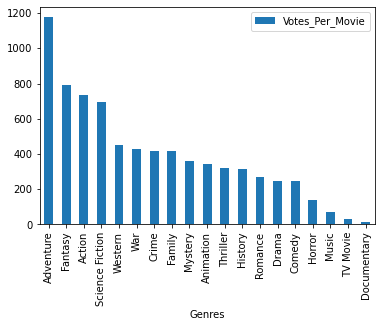

In [263]:
TMDB_A.sort_values('Votes_Per_Movie', ascending=False).plot(x='Genres',y='Votes_Per_Movie',kind='bar');

**Again, a plot of the popularity also places Adventure at the top**

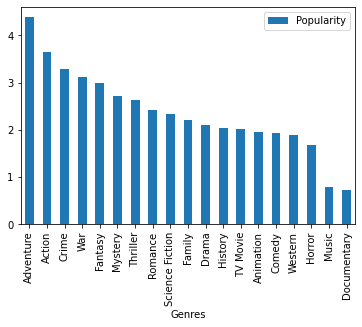

In [264]:
TMDB_A.sort_values('Popularity', ascending=False).plot(x='Genres',y='Popularity',kind='bar');

##### Analysis of the IMDB Database
To Analyse the IMDB databases, ive joined the basics and ratings databases on the tconst column.
In doing this i allow comparisons to be made between different genres and their vote quantity

In [265]:
IMDB = pd.merge(imdbtbasics, imdbtratings, how='inner', on = 'tconst')

In [266]:
IMDB

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8


**Here i use the number of votes to conduct my analysis. I decided against using the ratings as the primary factor as some may have a really high rating but have very low votes. I chose against removing outliers in the number of votes as that means id have to remove the counts above the 3rd quartile and that would throw away the most popular films**

In [267]:
IMDB.sort_values('numvotes', ascending=False).head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2374,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2228,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
275,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
11963,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
320,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
502,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
1080,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
15184,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
2817,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
2510,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


**I repeat what i did in the TMDB dataset by creating a list of individual genres to analyze**

In [268]:
genre_list = IMDB['genres'].tolist()
genre_list


['Action,Crime,Drama',
 'Biography,Drama',
 'Drama',
 'Comedy,Drama',
 'Comedy,Drama,Fantasy',
 'Horror,Thriller',
 'Adventure,Animation,Comedy',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Animation,Drama,History',
 'Drama',
 'Drama',
 'Drama,Mystery',
 'Action,Animation,Comedy',
 'Crime,Drama',
 'Biography,Comedy,Drama',
 'Documentary',
 'Drama',
 'Action,Drama',
 'Documentary,History',
 'Sci-Fi',
 'Comedy',
 'Documentary',
 'Thriller',
 'Crime,Drama',
 'Adventure,Animation,Sci-Fi',
 'Action,Crime,Drama',
 'Drama,Horror',
 'Drama,Mystery,Thriller',
 'Drama,Family',
 'Adventure,Comedy,Romance',
 'Comedy,Drama',
 'Adventure,Animation,Comedy',
 'Adventure,Drama,Romance',
 'Comedy,Crime,Drama',
 'Biography',
 'Horror',
 'Comedy,Drama',
 'Drama',
 'Adventure,Comedy,Drama',
 'Drama,Sci-Fi,Thriller',
 'Action',
 'Comedy,Drama,Romance',
 'Action,Crime,Drama',
 'Action,Adventure,Sci-Fi',
 'Action,Crime,Drama',
 'Comedy,Drama',
 'Crime,Drama',
 'Adventure,Animation,Comedy

In [269]:
long_genre_list = []
for word in genre_list:
    word = word.split(",")
    long_genre_list.extend(word)

In [270]:
cleaned_genre_list = list(set(long_genre_list))
cleaned_genre_list

['Music',
 'Western',
 'Fantasy',
 'Reality-TV',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Crime',
 'Comedy',
 'War',
 'Family',
 'History',
 'News',
 'Adult',
 'Sport',
 'Musical',
 'Biography',
 'Romance',
 'Short',
 'Mystery',
 'Thriller',
 'Action',
 'Animation',
 'Documentary',
 'Horror',
 'Game-Show']

In [271]:
df = pd.DataFrame(cleaned_genre_list, columns=['Genres'])
df.head()

,Genres
0,Music
1,Western
2,Fantasy
3,Reality-TV
4,Adventure


**Here i build a dataframe to analyse each genre showing key information to conduct my analysis, i added a column called 'Votes_Per_Movie as this is a better representation of how each type of film performs on average**

In [272]:
frequency = []
vote_count = []
avg_vote = []
for genre in cleaned_genre_list:
    frequency.append(IMDB['genres'].str.count(genre).sum())
    vote_count.append(np.where(IMDB['genres'].str.contains(genre), IMDB['numvotes'],0).sum())
    avg_vote.append(IMDB[IMDB['genres'].str.contains(genre)]['averagerating'].median())
      

In [273]:
df['Frequency'] = pd.DataFrame(frequency)
df['Average_Rating'] = pd.DataFrame(avg_vote)
df['Vote_Count'] = pd.DataFrame(vote_count)
df['Votes_Per_Movie'] = df['Vote_Count'] / df['Frequency']

In [274]:
df.head()

,Genres,Frequency,Average_Rating,Vote_Count,Votes_Per_Movie
0,Music,2689,7.1,6674340,2482.089996
1,Western,280,6.1,2452376,8758.485714
2,Fantasy,2126,6.0,26335704,12387.443086
3,Reality-TV,17,6.9,459,27.000000
4,Adventure,3817,6.4,84232589,22067.746660


In [275]:
df.sort_values('Genres', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Genres,Frequency,Average_Rating,Vote_Count,Votes_Per_Movie
0,Action,6988,6.00,101161682,14476.485690
1,Adult,3,3.40,164,54.666667
2,Adventure,3817,6.40,84232589,22067.746660
3,Animation,1743,6.50,15353302,8808.549627
4,Biography,3809,7.20,21609446,5673.259648
5,Comedy,17290,6.10,74305805,4297.617409
6,Crime,4611,6.20,39631356,8594.959011
7,Documentary,17753,7.40,4739345,266.960232
8,Drama,30788,6.50,119567500,3883.574769
9,Family,3412,6.50,8636710,2531.274912


**The below plots show that Adventure is the most Popular of the genres, although not necessarily the highest rated**

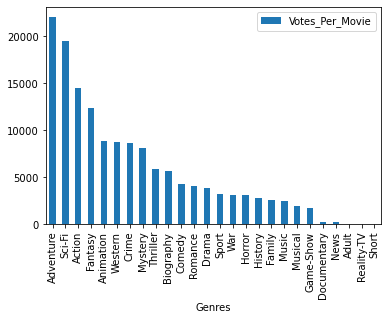

In [276]:
df.sort_values('Votes_Per_Movie',ascending=False).plot(x='Genres', y='Votes_Per_Movie', kind="bar");

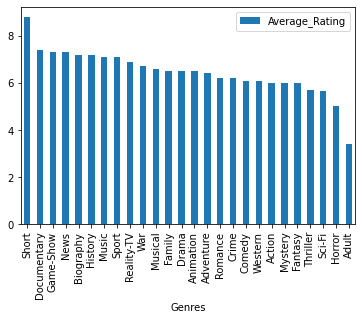

In [277]:
df.sort_values('Average_Rating', ascending=False).plot(x='Genres', y='Average_Rating', kind="bar");

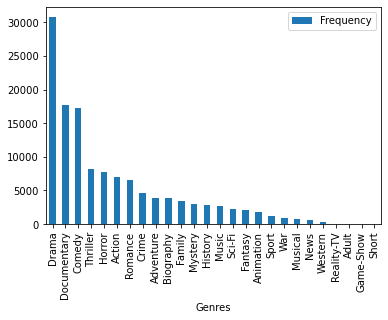

In [278]:
df.sort_values('Frequency', ascending=False).plot(x='Genres', y='Frequency', kind="bar");

## Evaluation
The analysis performed above has clearly outlined what types of films to make so i quite satisfied that this can be used by Microsoft Movie Studio to direct themselves on the right path

## Conclusions
This analysis leads to one key recommendation for the Microsoft Movie Studios:
 - The main 3 genres of movies that they should produce is Adventure, Action and Sci-Fi
     - In Popularity, Adventure is the most popular movie type
     - Action is the most profitable movie type